# **Logistic Regression on the Iris Dataset**

Logistic Regression can be used as a binary classifier. Here, I use this algorithm to discriminate between Iris Virginica and non-Iris Virginica classes. As a reminder, the dataset consists of three iris subspecies: Setosa, Versicolor, and Virginica. The goal is to build a model that predicts whether a given observation belongs to the Iris Virginica class or not.

# 1. Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import plotly.express as px
from mpl_toolkits.axes_grid1 import make_axes_locatable
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# 2. Load the data

In [ ]:
# Load and prepare the Iris dataset
data = pd.read_csv('https://raw.githubusercontent.com/govinda-lienart/iris_dataset/refs/heads/main/iris.csv')
data.rename(columns={'variety': 'species'}, inplace=True)
print(data.columns)

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'species'],
      dtype='object')


# 3. Simple visualization of dataset

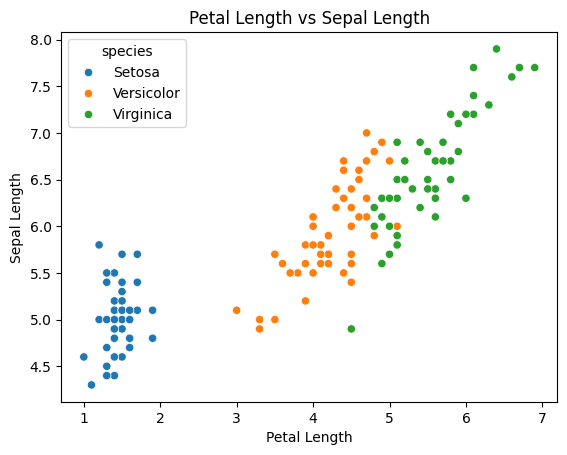

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setosa vs Virginica vs Versicolor
sns.scatterplot(data=iris, x="petal.length", y="sepal.length", hue="species")
plt.title("Petal Length vs Sepal Length")
plt.xlabel("Petal Length")
plt.ylabel("Sepal Length")
plt.show()

The graph illustrates that Petal Length is the most significant feature for distinguishing between Iris species, particularly Setosa from the other two species, as it shows clear separation along the x-axis. Sepal Length, however, has less distinguishing power, with substantial overlap between Versicolor and Virginica. This observation suggests that Petal Length is a crucial factor for classification, making feature reduction a good approach. By using just Petal Length and possibly Petal Width, a simpler and more efficient model can be built, reducing unnecessary complexity. We can then compare this model with one using all four features to assess whether the additional features truly enhance performance or if a simpler model would suffice.

# 4. Logistical regression: Logistic Regression Model

### 4.1 Model 1: Logistical regresion with Petal Features for Binary Classification (Virginica vs Not Virginica)

In [ ]:
# Model 1: Logistic Regression using only petal features
X_model_1 = data[["petal.length", "petal.width"]]  # Only petal length and width
y_binary = data['species'].apply(lambda x: "Not Virginica" if x != "Virginica" else x)  # Binary target variable

In [ ]:
# Before: Original target variable
print("Original Target Variable (species):")
print(data['species'].head(5))
print(data['species'].head(5))

# After: Binary target variable
print("\nBinary Target Variable (y_binary):")
print(y_binary.head(5))
print(y_binary.tail(5))

Original Target Variable (species):
0    Setosa
1    Setosa
2    Setosa
3    Setosa
4    Setosa
Name: species, dtype: object
0    Setosa
1    Setosa
2    Setosa
3    Setosa
4    Setosa
Name: species, dtype: object

Binary Target Variable (y_binary):
0    Not Virginica
1    Not Virginica
2    Not Virginica
3    Not Virginica
4    Not Virginica
Name: species, dtype: object
145    Virginica
146    Virginica
147    Virginica
148    Virginica
149    Virginica
Name: species, dtype: object


In [ ]:
# Train-test split for Model 1 (using only petal features)
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_model_1, y_binary, test_size=0.3, random_state=42)

In [ ]:
# Train Logistic Regression model for Model 1
lr_model_1 = LogisticRegression()
lr_model_1.fit(X_train_1, y_train_1)
y_pred_1 = lr_model_1.predict(X_test_1)

### 4.2 Model 2: Logistical regresion with all features for Binary Classification (Virginica vs Not Virginica)

For Model 2, the code begins by selecting all four features from the dataset: “petal.length”, “petal.width”, “sepal.length”, and “sepal.width”, which are stored in the variable X_model_2. Then, the train-test split is performed using the train_test_split function, which divides the data into training and testing sets. Specifically, 70% of the data is used for training (X_train_2, y_train_2), and 30% is reserved for testing (X_test_2, y_test_2). After splitting the data, a Logistic Regression model is trained on the training set using lr_model_2.fit(X_train_2, y_train_2). After training, the model is applied to the test data (X_test_2) to make predictions. The predict() function generates predicted labels (y_pred_2) for the test set based on the learned patterns. These predictions are then compared to the true labels (y_test_2) to evaluate the model’s performance, at a later stage using metrics like accuracy, precision, recall, and F1-score.

In [ ]:
# Model 2: Logistic Regression using all features
X_model_2 = data[["petal.length", "petal.width", "sepal.length", "sepal.width"]]  # All four features

# Train-test split for Model 2 (using all features)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_model_2, y_binary, test_size=0.3, random_state=42)

# Train Logistic Regression model for Model 2
lr_model_2 = LogisticRegression()
lr_model_2.fit(X_train_2, y_train_2)
y_pred_2 = lr_model_2.predict(X_test_2)

### 4.3 Evaluate performance for both models

The accuracy is computed by comparing the predicted labels (y_pred_2) to the actual labels (y_test_2) from the test set. This comparison allows us to assess how well the model has generalized to new, unseen data by determining how many of the predictions match the true values in the test set.

In [ ]:
# Evaluate performance for both models by comparing the predicted labels with the true labels
accuracy_1 = accuracy_score(y_test_1, y_pred_1)  # Accuracy for Model 1
accuracy_2 = accuracy_score(y_test_2, y_pred_2)  # Accuracy for Model 2

In [ ]:

# Print comparison of accuracy for both models
print(f"Accuracy of Model 1 (Petal Features Only): {accuracy_1:.4f}")
print(f"Accuracy of Model 2 (All Features): {accuracy_2:.4f}")

# Classification Report for both models, showing precision, recall, f1-score, etc.
# This helps us evaluate the performance of the model in more detail.
print("\nClassification Report for Model 1 (Petal Features Only):")
print(classification_report(y_test_1, y_pred_1))

print("\nClassification Report for Model 2 (All Features):")
print(classification_report(y_test_2, y_pred_2))



Accuracy of Model 1 (Petal Features Only): 1.0000
Accuracy of Model 2 (All Features): 1.0000

Classification Report for Model 1 (Petal Features Only):
               precision    recall  f1-score   support

Not Virginica       1.00      1.00      1.00        32
    Virginica       1.00      1.00      1.00        13

     accuracy                           1.00        45
    macro avg       1.00      1.00      1.00        45
 weighted avg       1.00      1.00      1.00        45


Classification Report for Model 2 (All Features):
               precision    recall  f1-score   support

Not Virginica       1.00      1.00      1.00        32
    Virginica       1.00      1.00      1.00        13

     accuracy                           1.00        45
    macro avg       1.00      1.00      1.00        45
 weighted avg       1.00      1.00      1.00        45



Both Model 1 (using only petal features) and Model 2 (using all features) achieve perfect performance, with an accuracy of 1.00, precision, recall, and F1-score all at 1.00 for both classes (“Virginica” and “Not Virginica”). The classification report shows that the models are correctly classifying all observations, with no misclassifications. Both models have identical results, indicating that adding the sepal features did not improve the model’s ability to predict the target variable, which suggests that petal length and width alone were sufficient for perfect classification in this particular dataset. The macro and weighted averages of 1.00 reinforce that the models perform uniformly across all classes.

The reason you’re seeing accuracy and classification scores of 1.0 across all metrics, even if the model may not be perfect in practice, is likely due to the fact that the dataset in question is well-separated and the model has been able to perfectly classify the test data. This means that the logistic regression model is correctly predicting all of the data points, leading to a precision, recall, and f1-score of 1.0 for each class. In simpler terms, the model isn’t making any mistakes on the dataset it’s tested on, and therefore, the metrics indicate perfect performance.

However, it is essential to consider that this could also suggest a potential overfitting issue or a simple dataset where the features are highly distinct. For instance, if the data used for testing is very similar or even identical to the data used for training, the model might appear perfect, but it may not generalize well to new or unseen data. This is why it’s crucial to evaluate the model on more challenging and diverse datasets, check the cross-validation results, or test with new data that wasn’t used during training. Additionally, inspecting confusion matrices can provide further insights into model behavior, especially in case of class imbalances or if the model is overfitting to certain classes.

# 5. Decision Boundaries

The code visualizes the decision boundaries of a logistic regression model trained to classify Iris species as “Virginica” or “Not Virginica” based on the petal length and petal width features. It starts by fitting a logistic regression model (lr.fit(X_binary, y_binary)) on the data where the target variable is binary, with “Virginica” as one class and everything else as “Not Virginica”. A mesh grid is then created over the petal length and width values using np.linspace and np.meshgrid. This grid is used to predict the class probabilities for each point on the grid using lr.predict_proba. The y_proba values represent the probabilities of the samples being classified as “Virginica” or “Not Virginica”. Two separate DataFrames are created, one for each class (Virginica and Not Virginica), storing the predicted probabilities.

The first part of the visualization (ax1) shows the decision boundary for the “Not Virginica” class, with contour plots illustrating the regions where the model predicts a higher probability for this class. Data points are plotted on top, with green dots representing “Virginica” and black dots representing “Not Virginica”. The second plot (ax2) displays the decision boundary for the “Virginica” class, where the contour lines represent areas with higher predicted probabilities for “Virginica”. These plots give a visual representation of how well the model distinguishes between the two classes. Finally, a 3D scatter plot is created using plotly.express to show the probability distribution for “Virginica” based on petal length and petal width. The color gradient in the 3D plot highlights areas of high or low probability for the “Virginica” class, giving an intuitive understanding of the decision-making process in the model.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



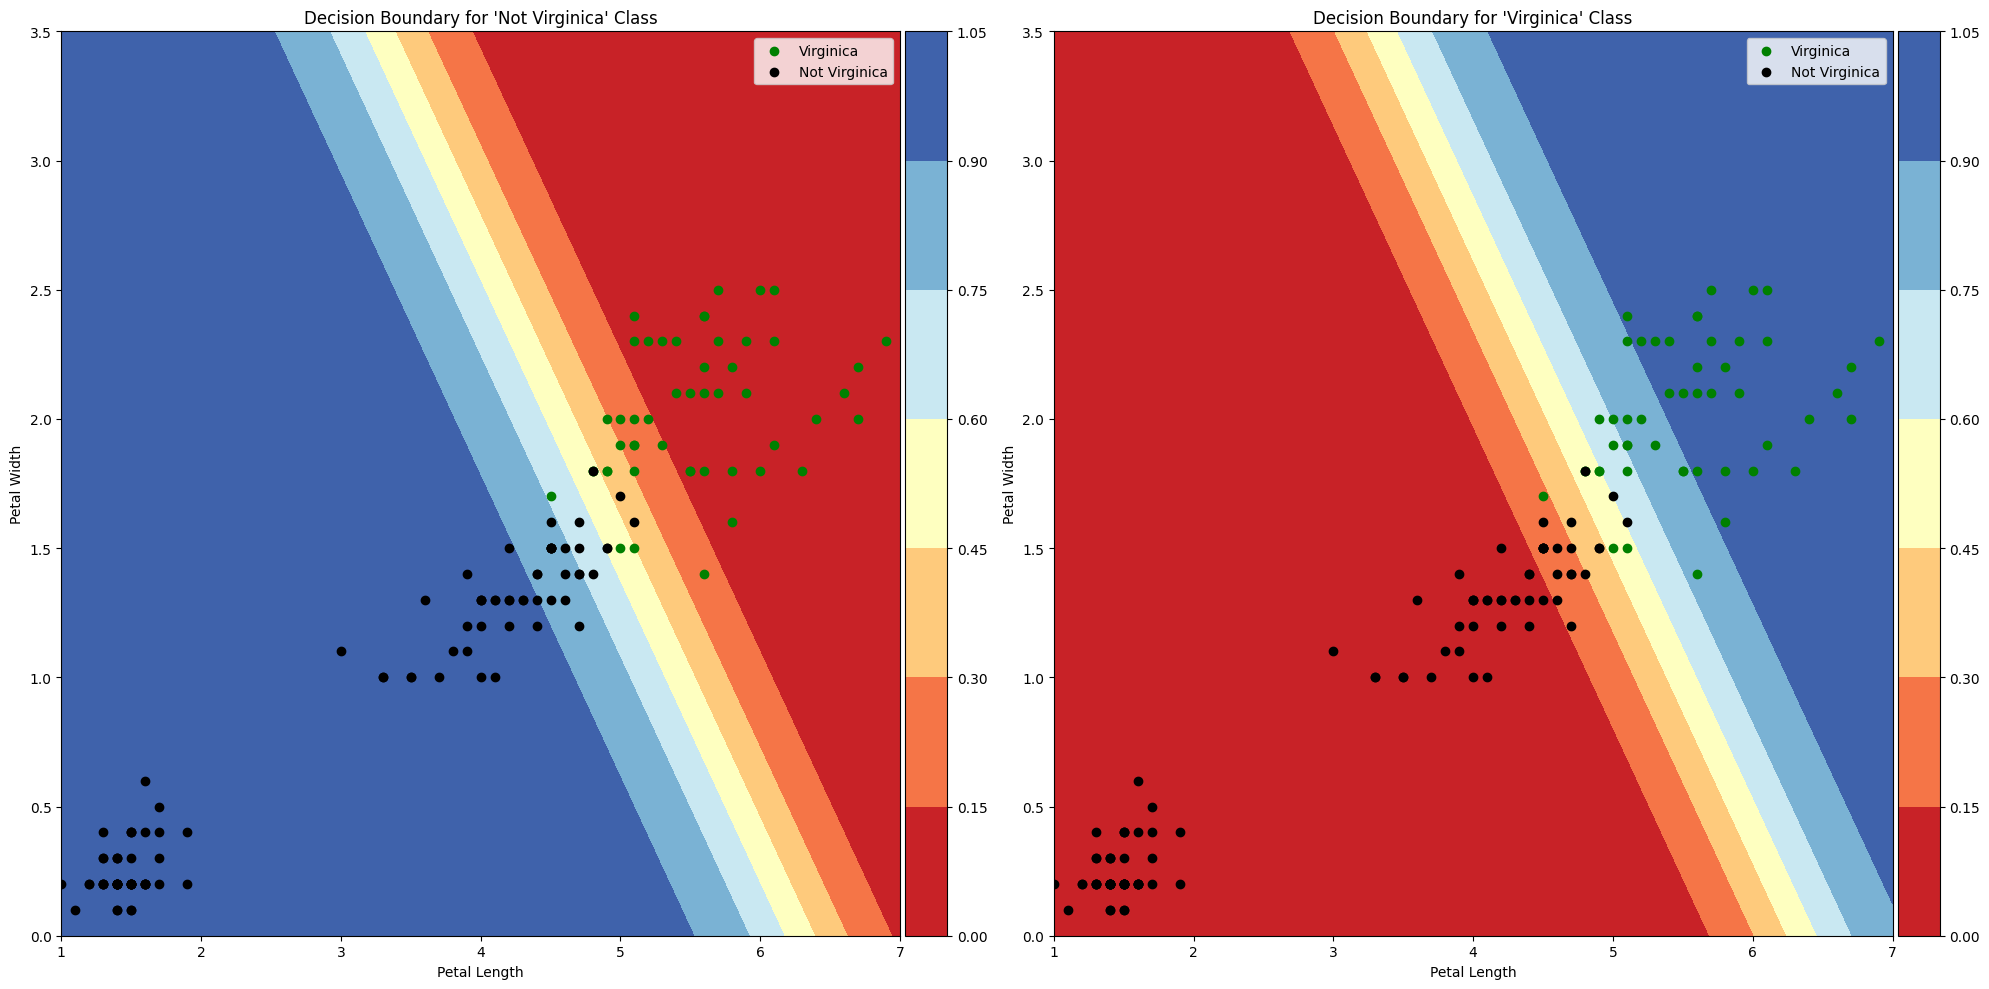

In [ ]:
# Visualizing the decision boundary for "Not Virginica" and "Virginica"
lr = LogisticRegression()
lr.fit(X_binary, y_binary)

# Create a mesh grid for decision boundary
x1 = np.linspace(1.0, 7.0, 100)
x2 = np.linspace(0.0, 3.5, 100)
xx, yy = np.meshgrid(x1, x2)

# Predict probabilities for each point on the grid
y_proba = lr.predict_proba(np.c_[xx.ravel(), yy.ravel()])

# Create a DataFrame for virginica and non-virginica probabilities
virginica = pd.DataFrame(data={"petal.length": xx.ravel(), "petal.width": yy.ravel(), "proba": y_proba[:, 1]})
not_virginica = pd.DataFrame(data={"petal.length": xx.ravel(), "petal.width": yy.ravel(), "proba": y_proba[:, 0]})

# Plot decision boundaries for "Not Virginica" class
fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(121)
im1 = ax1.contourf(xx, yy, y_proba[:, 0].reshape(100, 100), cmap=plt.cm.RdYlBu)
ax1.scatter(X_binary.loc[y_binary == "Virginica"].values[:, 0], X_binary.loc[y_binary == "Virginica"].values[:, 1], color='g', label="Virginica")
ax1.scatter(X_binary.loc[y_binary != "Virginica"].values[:, 0], X_binary.loc[y_binary != "Virginica"].values[:, 1], color='k', label="Not Virginica")
ax1.set_xlabel("Petal Length")
ax1.set_ylabel("Petal Width")
ax1.set_title("Decision Boundary for 'Not Virginica' Class")
divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')
ax1.legend()

# Plot decision boundaries for "Virginica" class
ax2 = fig.add_subplot(122)
im2 = ax2.contourf(xx, yy, y_proba[:, 1].reshape(100, 100), cmap=plt.cm.RdYlBu)
ax2.scatter(X_binary.loc[y_binary == "Virginica"].values[:, 0], X_binary.loc[y_binary == "Virginica"].values[:, 1], color='g', label="Virginica")
ax2.scatter(X_binary.loc[y_binary != "Virginica"].values[:, 0], X_binary.loc[y_binary != "Virginica"].values[:, 1], color='k', label="Not Virginica")
ax2.set_xlabel("Petal Length")
ax2.set_ylabel("Petal Width")
ax2.set_title("Decision Boundary for 'Virginica' Class")
divider = make_axes_locatable(ax2)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im2, cax=cax, orientation='vertical')
ax2.legend()

plt.tight_layout()
plt.show()

In the updated plot, the left plot represents the decision boundary for the “Not Virginica” class, while the right plot represents the “Virginica” class. The decision boundaries are created based on the logistic regression model, which predicts the likelihood of a data point belonging to either the “Virginica” or “Not Virginica” class based on the petal length and petal width. The color gradient in both plots indicates the predicted probability, with darker areas on the left plot showing lower probabilities for Virginica (and higher for “Not Virginica”) and vice versa on the right plot. The goal is to visualize how the logistic regression model separates these two classes based on the selected features.

The scatter points on both plots show the actual data points, where green represents the “Virginica” species, and black represents the “Not Virginica” species. In the left plot (Not Virginica), most of the data points are clustered in the darker regions of the graph, indicating a high probability of being classified as “Not Virginica.” On the right plot (Virginica), most of the green points are clustered in the darker regions of the graph, indicating a high probability of being classified as “Virginica.” The model essentially uses the petal length and petal width to determine the likelihood of each flower belonging to either of the two classes.

The color gradients also help us understand the areas where the model has less certainty in its predictions. The light regions, where the color is more neutral, represent the decision boundaries where the model struggles to confidently classify a flower as either “Virginica” or “Not Virginica.” These boundaries are important because they show us where the model could be potentially less accurate. The fact that these boundaries exist between the two clusters (black and green points) suggests that the petal features, particularly petal length and petal width, are good predictors of the classes but may not always be perfectly separable, especially in areas where the two classes overlap.

In [ ]:
# Create a 3D plot for Virginica probabilities
fig = px.scatter_3d(virginica, x='petal.length', y='petal.width', z='proba', color='proba', width=700, height=700)
fig.show()

The 3D plot visualizes the decision surface of a logistic regression model used to classify the Iris dataset into “Virginica” and “Not Virginica” based on petal length and petal width. The x-axis represents petal width, the y-axis represents petal length, and the z-axis shows the predicted probability of a flower being classified as Virginica, with yellow indicating a high probability and blue indicating a low probability. The smooth surface and color gradient demonstrate how the model’s predictions shift as the petal dimensions change, highlighting the areas where the model is most confident in its classification and where the transition between classes occurs.